# ML Tutorial Day 4

## Gradient Descent
Gradient descent is a method to train the linear regression model. We mode in the opposite direction of the steepest ascent until we reach the global minima of the function. We are performing linear regression and we want to find the line of best fit given a dataset of inputs and outputs.
The image below shows the given data points and the line of best fit.


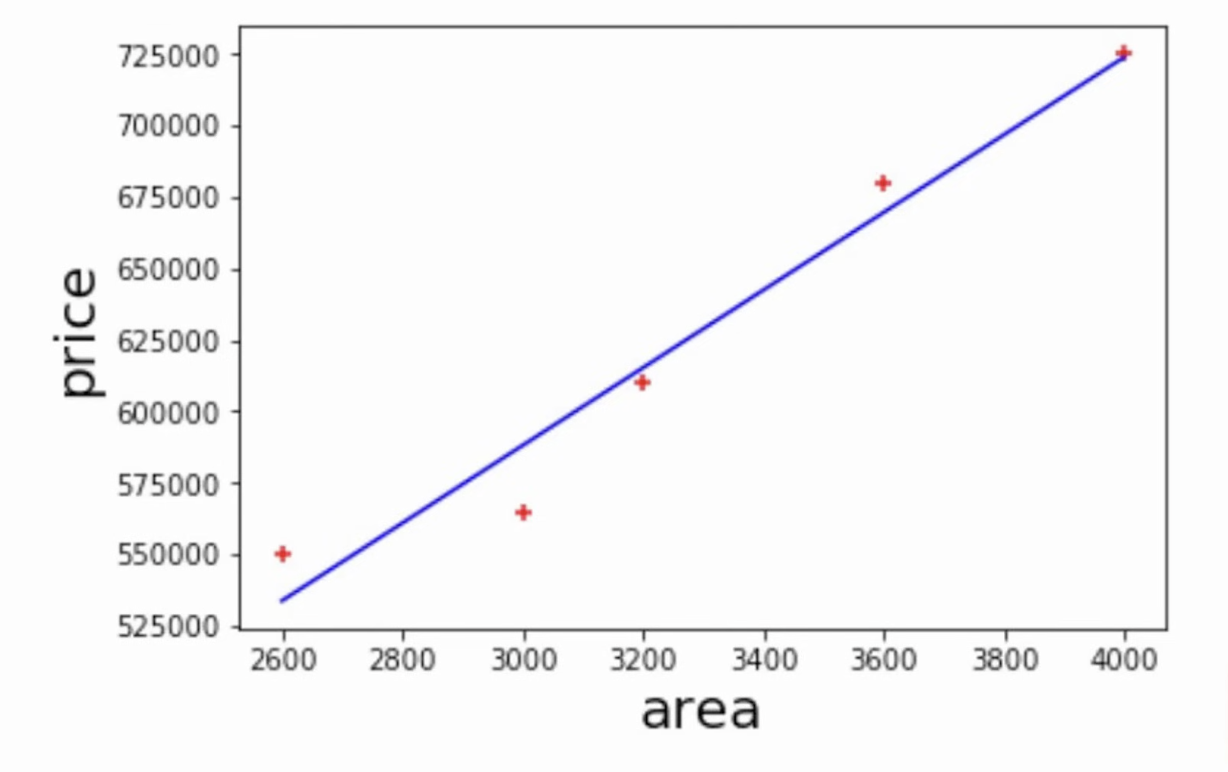

But we can draw infinitely many lines, so how do we find the best one?

We draw a general line with the following equation: $$y = mx + b$$

Now we calculate the error by finding the vertical distance between the point and the line and then squaring and summing it:

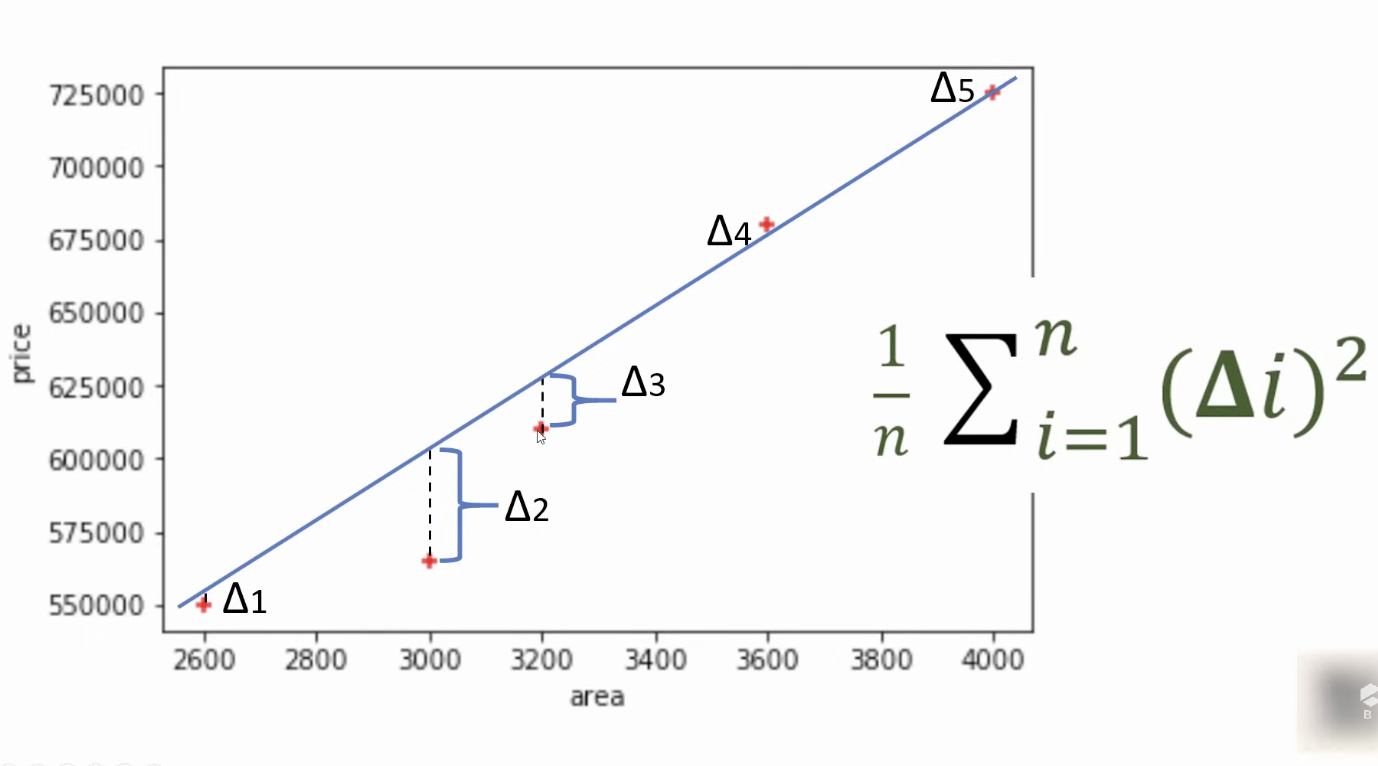

## Cost Function
This error is also known as mean square error, or MSE which is a type of cost function.

$$ \text{MSE} = \frac{1}{n} \sum_{k=1}^n (y_{i} - y_{predict})^2 $$

replacing $y_{predict}$ with our regression model to obtain:

$$ \text{MSE} = \frac{1}{n} \sum_{k=1}^n (y_{i} - (mx_{i} + b))^2 $$

Now we will understand how does gradient descent work.

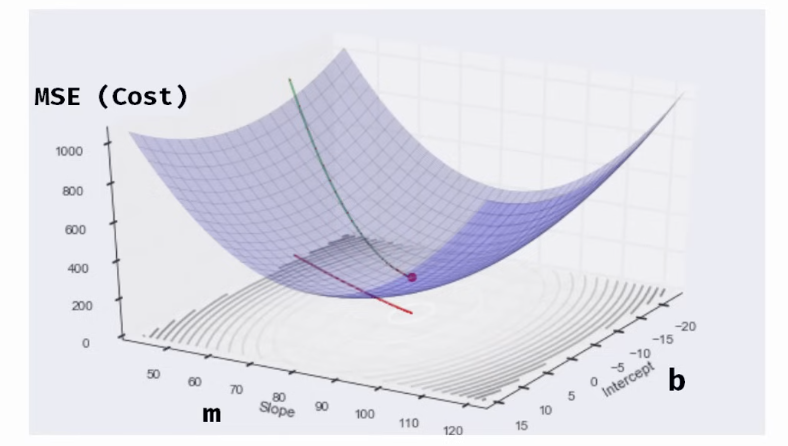

In the image above, we have plotted the variation of `cost` with `m` and `b`. Ideally we want to reach the bottom of the plot, where the cost is minimum and that point corresponds to a particular `m` and `b`.

We start from a particular value of `m` and `b` and calculate the gradient of `error` with respect to both, then find the direction of steepest descent. Once that direction is found, we move in that direction by taking a step downhill.

We perform the following steps to reach the minima:

1. Calculate `MSE`
$$ \text{MSE} = \frac{1}{n} \sum_{k=1}^n (y_{i} - (mx_{i} + b))^2 $$

2. Differentiate `MSE` with respect to `m` and `b` to find the direction of movement:

$$ \frac{\partial \text{MSE}}{\partial m} = \frac{\partial}{\partial m} \left[\frac{1}{n} \sum_{k=1}^n (y_{i} - (mx_{i} + b))^2 \right ]$$

$$
\implies \frac{\partial \text{MSE}}{\partial m} = -\frac{2}{n} \sum_{k = 1}^n x_{i}(y_{i} - (mx_{i}+b))
$$

$$ \frac{\partial \text{MSE}}{\partial b} = \frac{\partial}{\partial b} \left[\frac{1}{n} \sum_{k=1}^n (y_{i} - (mx_{i} + b))^2 \right ]$$

$$
\implies \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{k = 1}^n (y_{i} - (mx_{i}+b))
$$

3. Moving towards the minima
$$
m_{n+1} = m_{n} - \text{learning rate} \frac{\partial \text{MSE}}{\partial m}
$$
$$
b_{n+1} = b_{n} - \text{learning rate} \frac{\partial \text{MSE}}{\partial b}
$$

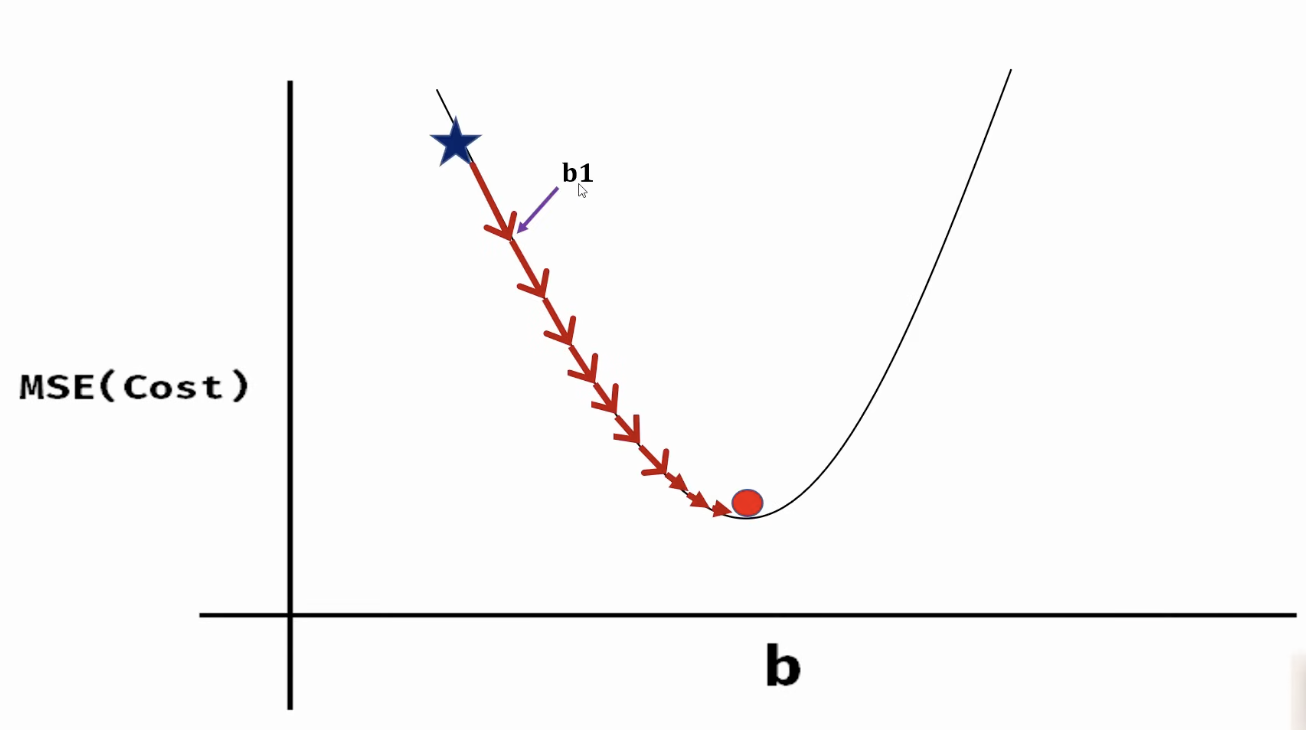

Learning rate controls the speed with which we approach the minima. If we go too fast, we might miss the minima and keeping a small learning rate, we might need a lot of steps before we reach the minima.

Now we will implement the gradient descent algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(iter, m_init, b_init, learning_rate, x, y):
    m_curr = m_init
    b_curr = b_init
    n = len(x)
    for i in range(iter):
        y_predict = m_curr * x + b_curr
        error = (1/n)*sum([i**2 for i in (y - y_predict)])
        # plt.plot([x[0], x[-1]], [m_curr * x[0] + b_curr, m_curr * x[-1] + b_curr])
        # plt.pause(0.05)
        m_deriv = -(2/n)*sum(x*(y-y_predict))
        b_deriv = -(2/n)*sum(y-y_predict)
        m_curr = m_curr - learning_rate*m_deriv
        b_curr = b_curr - learning_rate*b_deriv
        print(f"iteration: {i}, m: {m_curr}, b:{b_curr}, error: {error}" )
        if error < 1e-10:
            print("Algorithm converged! Ending the loop!")
            break
    # plt.show()


x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7,9, 11, 13])

gradient_descent(1000, 0, 0, 0.08, x, y)

iteration: 0, m: 4.96, b:1.44, error: 89.0
iteration: 1, m: 0.4991999999999983, b:0.26879999999999993, error: 71.10560000000002
iteration: 2, m: 4.451584000000002, b:1.426176000000001, error: 56.8297702400001
iteration: 3, m: 0.892231679999997, b:0.5012275199999995, error: 45.43965675929613
iteration: 4, m: 4.041314713600002, b:1.432759910400001, error: 36.35088701894832
iteration: 5, m: 1.2008760606719973, b:0.7036872622079998, error: 29.097483330142282
iteration: 6, m: 3.7095643080294423, b:1.4546767911321612, error: 23.307872849944438
iteration: 7, m: 1.4424862661541864, b:0.881337636696883, error: 18.685758762535738
iteration: 8, m: 3.4406683721083144, b:1.4879302070713722, error: 14.994867596913156
iteration: 9, m: 1.6308855378034224, b:1.0383405553279617, error: 12.046787238456794
iteration: 10, m: 3.2221235247119777, b:1.5293810083298451, error: 9.691269350698109
iteration: 11, m: 1.7770832372205707, b:1.1780607551353204, error: 7.8084968312098315
iteration: 12, m: 3.04394757724